In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.io import arff

The Air Quality Index (AQI) is an index for reporting daily air quality. It tells you how clean
or polluted your air is, and what associated health effects might be a concern for you. The
AQI focuses on health effects you may experience within a few hours or days after breathing
polluted air. The AQI is reported according to the Environmental Protection Agency's scale.
The Health Department obtains the pollen forecast from Pollen.com. Pollen forecasts are
based on a variety of environmental and seasonal factors, including past and current pollen
counts over the past 24 - 72 hours and the weather conditions. The pollen forecasts estimate
how much pollen an allergy sufferer is likely to be exposed to in the future. The pollen
forecast is currently reported on a scale of 0 to 12 as follows:

Pollen Count Pollen Level
0.0 to 2.4 Low
2.5 to 4.8 Low – Medium
4.9 to 7.2 Medium
7.3 to 9.6 Medium – High
9.7 to 12.0 High




In [2]:
data = pd.read_csv('Air_Quality_and_Pollen_Count.csv')
cleaned_data = data.copy()
display(data.head())


,OBJECTID,AQI,Category,ResponsiblePollutant,PollenCount,PollenType,PollenDescription,ReportDateTime
0,1,47.0,Good,PM2.5,9.0,Juniper,Maple,2025/04/04 05:00:00+00
1,2,49.0,Good,PM2.5,1.0,Elm,Juniper,2025/04/03 05:00:00+00
2,3,51.0,Moderate,PM2.5,11.0,Elm,Juniper,2025/04/02 05:00:00+00
3,4,50.0,Good,PM2.5,10.0,Elm,Juniper,2025/04/01 05:00:00+00
4,5,50.0,Good,PM2.5,2.0,Elm,Juniper,2025/03/31 05:00:00+00


**Question 1**: Explore the data by plotting AQI and Category across the years in two separate
plots. Make sure they have proper labels and titles. Use a datetime format for the dates.

a. How many times has the AQI been recorded above 120?

b. When did the Air Quality Index Category become unhealthy?

In [3]:
cleaned_data['ReportDateTime'] = pd.to_datetime(cleaned_data['ReportDateTime'])
cleaned_data['Date'] = cleaned_data['ReportDateTime'].dt.date
cleaned_data['Time'] = cleaned_data['ReportDateTime'].dt.time
cleaned_data['Year'] = cleaned_data['ReportDateTime'].dt.year
cleaned_data.drop('ReportDateTime', axis=1, inplace=True)

print("\n\nCleaned Data:")
display(cleaned_data.head())




Cleaned Data:


,OBJECTID,AQI,Category,ResponsiblePollutant,PollenCount,PollenType,PollenDescription,Date,Time,Year
0,1,47.0,Good,PM2.5,9.0,Juniper,Maple,2025-04-04,05:00:00,2025
1,2,49.0,Good,PM2.5,1.0,Elm,Juniper,2025-04-03,05:00:00,2025
2,3,51.0,Moderate,PM2.5,11.0,Elm,Juniper,2025-04-02,05:00:00,2025
3,4,50.0,Good,PM2.5,10.0,Elm,Juniper,2025-04-01,05:00:00,2025
4,5,50.0,Good,PM2.5,2.0,Elm,Juniper,2025-03-31,05:00:00,2025


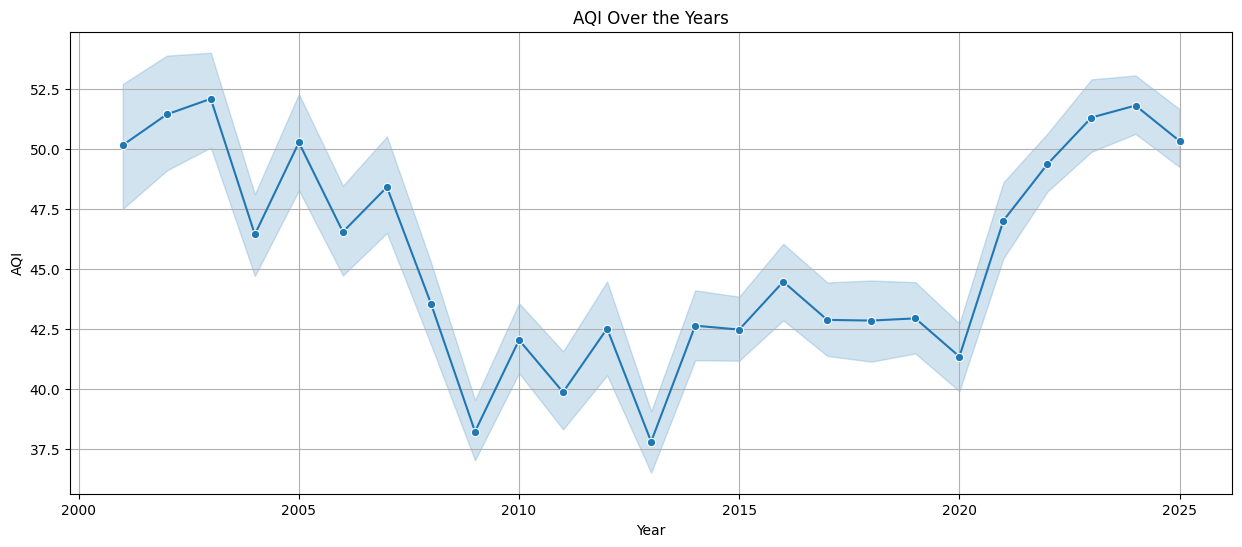

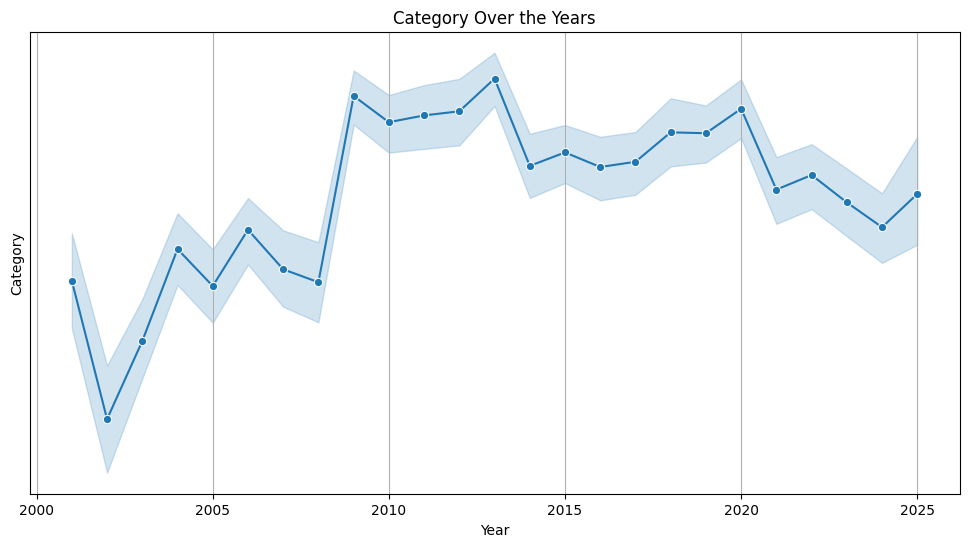

In [4]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=cleaned_data, x='Year', y='AQI', marker='o')
plt.title('AQI Over the Years')
plt.xlabel('Year')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=cleaned_data, x='Year', y='Category', marker='o')
plt.title('Category Over the Years')
plt.xlabel('Year')
plt.ylabel('Category')
plt.grid(True)
plt.show()

In [5]:
display(cleaned_data[cleaned_data['AQI'] > 120])
count = cleaned_data[cleaned_data['AQI'] > 120].shape[0]
print(f"The AQI has been recorded above 120 {count} times")

,OBJECTID,AQI,Category,ResponsiblePollutant,PollenCount,PollenType,PollenDescription,Date,Time,Year
1754,1755,123.0,Unhealthy for Sensitive Groups,PM2.5,3.0,Grass,Slight,2020-06-27,05:00:00,2020
2507,2508,151.0,Unhealthy,Ozone 8-hr,5.0,Grass,Juniper,2018-06-09,05:00:00,2018
2836,2837,132.0,Unhealthy for Sensitive Groups,Ozone 8-hr,3.0,Grass,Ragweed,2017-07-22,05:00:00,2017
3678,3679,140.0,Unhealthy for Sensitive Groups,Ozone 8-hr,1.0,Grass,Slight,2012-08-09,05:00:00,2012
3718,3719,145.0,Unhealthy for Sensitive Groups,Ozone 8-hr,NaN,NaN,Not on file,2012-06-30,05:00:00,2012
3719,3720,124.0,Unhealthy for Sensitive Groups,Ozone 8-hr,2.0,Grass,Slight,2012-06-29,05:00:00,2012
4238,4239,125.0,Unhealthy for Sensitive Groups,Ozone 8-hr,3.0,Grass,Slight,2016-06-26,05:00:00,2016
4253,4254,122.0,Unhealthy for Sensitive Groups,Ozone 8-hr,5.0,Grass,Juniper,2016-06-11,05:00:00,2016
5085,5086,124.0,Unhealthy for Sensitive Groups,Ozone 8-hr,8.0,Grass,Moderate,2011-08-03,05:00:00,2011
6759,6760,140.0,Unhealthy for Sensitive Groups,Ozone 8-hr,1.0,Grass,Slight,2007-08-16,05:00:00,2007


The AQI has been recorded above 120 14 times


In [6]:
unhealthy_air_quality = cleaned_data[
    (cleaned_data['Category'] == 'Unhealthy')
]

display(unhealthy_air_quality[['Date', 'Time', 'Category', 'AQI']])

,Date,Time,Category,AQI
2507,2018-06-09,05:00:00,Unhealthy,151.0
8778,2001-07-24,05:00:00,Unhealthy,132.0
8786,2001-07-12,05:00:00,Unhealthy,105.0
8800,2001-06-21,05:00:00,Unhealthy,122.0


**Question 2**: Which pollen type occurs the most? Hint: You can use a scatterplot if needed.


In [7]:
pollen_type_counts = cleaned_data['PollenType'].value_counts()
print("Pollen Type Counts:")
display(pollen_type_counts)

most_common_pollen = pollen_type_counts.index[0]
print(f"\nThe most common pollen type is: {most_common_pollen}")

Pollen Type Counts:


,count
PollenType,
Grass,2330
Ragweed,603
Cedar,405
Elm,398
Alder,291
Juniper,235
Birch,181
Maple,132
Hickory,88



The most common pollen type is: Grass


**Question 3 **: **[Open-ended] Based on this data, do you think Nashville is a city that is
comfortable to live (based on the air quality and pollen only)? Why?

**Answer **: Nashville is reasonably comfortable to live in from the air quality + pollen standpoint, especially compared to places with consistently very poor air or extreme allergen loads.
Whenever there are pollution spikes or pollen is high, this may be uncomfortable for people with allergies or respiratory issues.


**Question 4**: [A vectorization problem]. Compare the manual approach versus a vectorized
approach to find the mean AQI for each Air Quality Category ('Category' in the table).
For the vectorized method, you can use groupby() and mean() method in pandas datatype
(ex: data.groupby('ColumnName') and dataList.mean()). For the manual method, a
regular for-loop can be used. Calculate the time difference between the two approaches and
evaluate.


In [8]:
import time

# Manual
start_time_manual = time.time()
manual_mean_aqi = {}
for category in cleaned_data['Category'].unique():
    manual_mean_aqi[category] = cleaned_data[cleaned_data['Category'] == category]['AQI'].mean()
end_time_manual = time.time()
manual_time = end_time_manual - start_time_manual

print("Manual approach mean AQI:")
display(manual_mean_aqi)
print(f"Manual approach time: {manual_time} seconds")

# Vectorized
start_time_vectorized = time.time()
vectorized_mean_aqi = cleaned_data.groupby('Category')['AQI'].mean()
end_time_vectorized = time.time()
vectorized_time = end_time_vectorized - start_time_vectorized

print("\nVectorized approach mean AQI:")
display(vectorized_mean_aqi)
print(f"Vectorized approach time: {vectorized_time} seconds")

print(f"\nTime difference (Manual - Vectorized): {manual_time - vectorized_time} seconds")

Manual approach mean AQI:


{'Good': np.float64(36.966282757469536),
 'Moderate': np.float64(62.240839694656486),
 'Not on file': nan,
 'Unhealthy for Sensitive Groups': np.float64(110.07894736842105),
 'Unhealthy': np.float64(127.5),
 'SLIGHT': np.float64(60.0)}

Manual approach time: 0.012945175170898438 seconds

Vectorized approach mean AQI:


,AQI
Category,
Good,36.966283
Moderate,62.240840
Not on file,NaN
SLIGHT,60.000000
Unhealthy,127.500000
Unhealthy for Sensitive Groups,110.078947


Vectorized approach time: 0.009638071060180664 seconds

Time difference (Manual - Vectorized): 0.0033071041107177734 seconds
